# ALL DRUGS NOTEBOOK

The following notebook is showing the **hyperparameter tuning, classification and cross classification** for **ALL DRUGS**

# Part 1: Data extraction and preparing the dataframe

### 1.1 Importing the files

In [1]:
import scipy.io
import mat73
import matplotlib
import pathlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import random
import sklearn
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedShuffleSplit
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix,roc_auc_score,roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,RobustScaler


from numpy.random import RandomState

import mne
from mne.io import read_raw_fif, read_raw_ctf, read_raw_bti, read_raw_kit
from mne.io import read_raw_artemis123
from mne.datasets import sample, spm_face, testing
from mne.viz import plot_alignment, set_3d_title

#KET

ketdru01 = mat73.loadmat('KET_DRU_subject_01.mat')
ketpla01 = mat73.loadmat('KET_PLA_subject_01.mat')
ketdru02 = mat73.loadmat('KET_DRU_subject_02.mat')
ketpla02 = mat73.loadmat('KET_PLA_subject_02.mat')
ketdru03 = mat73.loadmat('KET_DRU_subject_03.mat')
ketpla03 = mat73.loadmat('KET_PLA_subject_03.mat')
ketdru04 = mat73.loadmat('KET_DRU_subject_04.mat')
ketpla04 = mat73.loadmat('KET_PLA_subject_04.mat')
ketdru05 = mat73.loadmat('KET_DRU_subject_05.mat')
ketpla05 = mat73.loadmat('KET_PLA_subject_05.mat')
ketdru06 = mat73.loadmat('KET_DRU_subject_06.mat')
ketpla06 = mat73.loadmat('KET_PLA_subject_06.mat')
ketdru07 = mat73.loadmat('KET_DRU_subject_07.mat')
ketpla07 = mat73.loadmat('KET_PLA_subject_07.mat')
ketdru08 = mat73.loadmat('KET_DRU_subject_08.mat')
ketpla08 = mat73.loadmat('KET_PLA_subject_08.mat')
ketdru09 = mat73.loadmat('KET_DRU_subject_09.mat')
ketpla09 = mat73.loadmat('KET_PLA_subject_09.mat')
ketdru10 = mat73.loadmat('KET_DRU_subject_10.mat')
ketpla10 = mat73.loadmat('KET_PLA_subject_10.mat')
ketdru11 = mat73.loadmat('KET_DRU_subject_11.mat')
ketpla11 = mat73.loadmat('KET_PLA_subject_11.mat')
ketdru12 = mat73.loadmat('KET_DRU_subject_12.mat')
ketpla12 = mat73.loadmat('KET_PLA_subject_12.mat')
ketdru13 = mat73.loadmat('KET_DRU_subject_13.mat')
ketpla13 = mat73.loadmat('KET_PLA_subject_13.mat')
ketdru14 = mat73.loadmat('KET_DRU_subject_14.mat')
ketpla14 = mat73.loadmat('KET_PLA_subject_14.mat')
ketdru15 = mat73.loadmat('KET_DRU_subject_15.mat')
ketpla15 = mat73.loadmat('KET_PLA_subject_15.mat')
ketdru16 = mat73.loadmat('KET_DRU_subject_16.mat')
ketpla16 = mat73.loadmat('KET_PLA_subject_16.mat')
ketdru17 = mat73.loadmat('KET_DRU_subject_17.mat')
ketpla17 = mat73.loadmat('KET_PLA_subject_17.mat')
ketdru18 = mat73.loadmat('KET_DRU_subject_18.mat')
ketpla18 = mat73.loadmat('KET_PLA_subject_18.mat')
ketdru19 = mat73.loadmat('KET_DRU_subject_19.mat')
ketpla19 = mat73.loadmat('KET_PLA_subject_19.mat')


#LSD

lsddru01 = mat73.loadmat('LSD_DRU_subject_01.mat')
lsdpla01 = mat73.loadmat('LSD_PLA_subject_01.mat')
lsddru02 = mat73.loadmat('LSD_DRU_subject_02.mat')
lsdpla02 = mat73.loadmat('LSD_PLA_subject_02.mat')
lsddru03 = mat73.loadmat('LSD_DRU_subject_03.mat')
lsdpla03 = mat73.loadmat('LSD_PLA_subject_03.mat')
lsddru04 = mat73.loadmat('LSD_DRU_subject_04.mat')
lsdpla04 = mat73.loadmat('LSD_PLA_subject_04.mat')
lsddru05 = mat73.loadmat('LSD_DRU_subject_05.mat')
lsdpla05 = mat73.loadmat('LSD_PLA_subject_05.mat')
lsddru06 = mat73.loadmat('LSD_DRU_subject_06.mat')
lsdpla06 = mat73.loadmat('LSD_PLA_subject_06.mat')
lsddru07 = mat73.loadmat('LSD_DRU_subject_07.mat')
lsdpla07 = mat73.loadmat('LSD_PLA_subject_07.mat')
lsddru08 = mat73.loadmat('LSD_DRU_subject_08.mat')
lsdpla08 = mat73.loadmat('LSD_PLA_subject_08.mat')
lsddru09 = mat73.loadmat('LSD_DRU_subject_09.mat')
lsdpla09 = mat73.loadmat('LSD_PLA_subject_09.mat')
lsddru10 = mat73.loadmat('LSD_DRU_subject_10.mat')
lsdpla10 = mat73.loadmat('LSD_PLA_subject_10.mat')
lsddru11 = mat73.loadmat('LSD_DRU_subject_11.mat')
lsdpla11 = mat73.loadmat('LSD_PLA_subject_11.mat')
lsddru12 = mat73.loadmat('LSD_DRU_subject_12.mat')
lsdpla12 = mat73.loadmat('LSD_PLA_subject_12.mat')
lsddru13 = mat73.loadmat('LSD_DRU_subject_13.mat')
lsdpla13 = mat73.loadmat('LSD_PLA_subject_13.mat')
lsddru14 = mat73.loadmat('LSD_DRU_subject_14.mat')
lsdpla14 = mat73.loadmat('LSD_PLA_subject_14.mat')
lsddru15 = mat73.loadmat('LSD_DRU_subject_15.mat')
lsdpla15 = mat73.loadmat('LSD_PLA_subject_15.mat')

#PSI

psidru01 = mat73.loadmat('PSI_DRU_subject_01.mat')
psipla01 = mat73.loadmat('PSI_PLA_subject_01.mat')
psidru02 = mat73.loadmat('PSI_DRU_subject_02.mat')
psipla02 = mat73.loadmat('PSI_PLA_subject_02.mat')
psidru03 = mat73.loadmat('PSI_DRU_subject_03.mat')
psipla03 = mat73.loadmat('PSI_PLA_subject_03.mat')
psidru04 = mat73.loadmat('PSI_DRU_subject_04.mat')
psipla04 = mat73.loadmat('PSI_PLA_subject_04.mat')
psidru05 = mat73.loadmat('PSI_DRU_subject_05.mat')
psipla05 = mat73.loadmat('PSI_PLA_subject_05.mat')
psidru06 = mat73.loadmat('PSI_DRU_subject_06.mat')
psipla06 = mat73.loadmat('PSI_PLA_subject_06.mat')
psidru07 = mat73.loadmat('PSI_DRU_subject_07.mat')
psipla07 = mat73.loadmat('PSI_PLA_subject_07.mat')
psidru08 = mat73.loadmat('PSI_DRU_subject_08.mat')
psipla08 = mat73.loadmat('PSI_PLA_subject_08.mat')
psidru09 = mat73.loadmat('PSI_DRU_subject_09.mat')
psipla09 = mat73.loadmat('PSI_PLA_subject_09.mat')
psidru10 = mat73.loadmat('PSI_DRU_subject_10.mat')
psipla10 = mat73.loadmat('PSI_PLA_subject_10.mat')
psidru11 = mat73.loadmat('PSI_DRU_subject_11.mat')
psipla11 = mat73.loadmat('PSI_PLA_subject_11.mat')
psidru12 = mat73.loadmat('PSI_DRU_subject_12.mat')
psipla12 = mat73.loadmat('PSI_PLA_subject_12.mat')
psidru13 = mat73.loadmat('PSI_DRU_subject_13.mat')
psipla13 = mat73.loadmat('PSI_PLA_subject_13.mat')
psidru14 = mat73.loadmat('PSI_DRU_subject_14.mat')
psipla14 = mat73.loadmat('PSI_PLA_subject_14.mat')

np.random.seed(244)

### Channel Labels

In [2]:
sLabels = 'PRC_L PRC_R FRS_L FRS_R FRB_L FRB_R FRM_L FRM_R FRO_L FRO_R FIO_L FIO_R FIT_L FIT_R FIB_L FIB_R RLO_L RLO_R SMA_L SMA_R OLF_L OLF_R FSM_L FSM_R FMO_L FMO_R REC_L REC_R INS_L INS_R CIA_L CIA_R CIM_L CIM_R CIP_L CIP_R HIP_L HIP_R PHI_L PHI_R AMY_L AMY_R CAL_L CAL_R CUN_L CUN_R LIN_L LIN_R OCS_L OCS_R OCM_L OCM_R OCI_L OCI_R FUS_L FUS_R POC_L POC_R PAS_L PAS_R PAI_L PAI_R SUM_L SUM_R ANG_L ANG_R PCU_L PCU_R PLO_L PLO_R CAU_L CAU_R PUT_L PUT_R PAL_L PAL_R THA_L THA_R HEL_L HEL_R TES_L TES_R TPS_L TPS_R TEM_L TEM_R TPM_L TPM_R TEI_L TEI_R'

wLabels = 'Precentral_L Precentral_R Frontal_Sup_L Frontal_Sup_R Frontal_Sup_Orb_L Frontal_Sup_Orb_R Frontal_Mid_L Frontal_Mid_R Frontal_Mid_Orb_L Frontal_Mid_Orb_R Frontal_Inf_Oper_L Frontal_Inf_Oper_R Frontal_Inf_Tri_L Frontal_Inf_Tri_R Frontal_Inf_Orb_L Frontal_Inf_Orb_R Rolandic_Oper_L Rolandic_Oper_R Supp_Motor_Area_L Supp_Motor_Area_R Olfactory_L Olfactory_R Frontal_Sup_Medial_L Frontal_Sup_Medial_R Frontal_Med_Orb_L Frontal_Med_Orb_R Rectus_L Rectus_R Insula_L Insula_R Cingulum_Ant_L Cingulum_Ant_R Cingulum_Mid_L Cingulum_Mid_R Cingulum_Post_L Cingulum_Post_R Hippocampus_L Hippocampus_R ParaHippocampal_L ParaHippocampal_R Amygdala_L Amygdala_R Calcarine_L Calcarine_R Cuneus_L Cuneus_R Lingual_L Lingual_R Occipital_Sup_L Occipital_Sup_R Occipital_Mid_L Occipital_Mid_R Occipital_Inf_L Occipital_Inf_R Fusiform_L Fusiform_R Postcentral_L Postcentral_R Parietal_Sup_L Parietal_Sup_R Parietal_Inf_L Parietal_Inf_R SupraMarginal_L SupraMarginal_R Angular_L Angular_R Precuneus_L Precuneus_R Paracentral_Lobule_L Paracentral_Lobule_R Caudate_L Caudate_R Putamen_L Putamen_R Pallidum_L Pallidum_R Thalamus_L Thalamus_R Heschl_L Heschl_R Temporal_Sup_L Temporal_Sup_R Temporal_Pole_Sup_L Temporal_Pole_Sup_R Temporal_Mid_L Temporal_Mid_R Temporal_Pole_Mid_L Temporal_Pole_Mid_R Temporal_Inf_L Temporal_Inf_R'

sLabels = sLabels.split()
wLabels = wLabels.split()

sLabels
len(wLabels)

90

### 1.2 Permutation Entropy and Complexity Measure

In [3]:
# this is code from https://github.com/srk-srinivasan/Permutation-Entropy/blob/master/p_entropy.py
# cite jbarberia, 2021


import numpy as np


def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0]) 

In [4]:
print(psidru01['X'][0].shape)

print(psidru01['X'][0][0].shape)

print(psidru01['X'][0][0])

#for epoch number 1 would need to find the permutation entropy measure of 0>1199 ms
#this is showing psi channel 1,epoch 1
print(psidru01['X'][0][0][0])
print(psidru01['X'][0][1][0])
print(psidru01['X'][0][2][0])
...
print(psidru01['X'][0][1199][0])
##should downsample to 600

(1200, 150)
(150,)
[ 0.14560671 -0.14675679 -0.13933838 -0.11864859 -0.01898622  0.24319495
 -0.01803406  0.04056843  0.08136551  0.07823705 -0.08339641 -0.09108324
  0.01700133 -0.06220204 -0.01264949  0.05808608 -0.02325606 -0.01497191
 -0.1599106   0.03420612  0.01660243 -0.10778332  0.09829037  0.12920124
 -0.12865016 -0.04484873 -0.12903703  0.02663067  0.18438327  0.09120353
 -0.00030724 -0.17499285 -0.08862225  0.04904435 -0.10124241 -0.12154097
 -0.01075447  0.04757984 -0.01486824  0.0097559  -0.00238753 -0.07286375
 -0.02928608  0.12325319 -0.11935217  0.09265818  0.03072914 -0.03872195
 -0.00544661 -0.11643304 -0.07467333 -0.08448504 -0.04202332  0.06754929
  0.01833599  0.08456787  0.06185138 -0.04488723 -0.06028439 -0.00150295
  0.0776045   0.0082845   0.04700009 -0.04240586  0.05473713 -0.1128919
 -0.00111508 -0.03584901 -0.01520969  0.07778081 -0.09500278 -0.01673685
  0.00471204 -0.0756368  -0.02253424 -0.00372495  0.02854643  0.09419227
  0.05899662  0.03062371 -0.07787

## Downsampling

In [5]:
wLabels
wLabels1 = wLabels
wLabels1

['Precentral_L',
 'Precentral_R',
 'Frontal_Sup_L',
 'Frontal_Sup_R',
 'Frontal_Sup_Orb_L',
 'Frontal_Sup_Orb_R',
 'Frontal_Mid_L',
 'Frontal_Mid_R',
 'Frontal_Mid_Orb_L',
 'Frontal_Mid_Orb_R',
 'Frontal_Inf_Oper_L',
 'Frontal_Inf_Oper_R',
 'Frontal_Inf_Tri_L',
 'Frontal_Inf_Tri_R',
 'Frontal_Inf_Orb_L',
 'Frontal_Inf_Orb_R',
 'Rolandic_Oper_L',
 'Rolandic_Oper_R',
 'Supp_Motor_Area_L',
 'Supp_Motor_Area_R',
 'Olfactory_L',
 'Olfactory_R',
 'Frontal_Sup_Medial_L',
 'Frontal_Sup_Medial_R',
 'Frontal_Med_Orb_L',
 'Frontal_Med_Orb_R',
 'Rectus_L',
 'Rectus_R',
 'Insula_L',
 'Insula_R',
 'Cingulum_Ant_L',
 'Cingulum_Ant_R',
 'Cingulum_Mid_L',
 'Cingulum_Mid_R',
 'Cingulum_Post_L',
 'Cingulum_Post_R',
 'Hippocampus_L',
 'Hippocampus_R',
 'ParaHippocampal_L',
 'ParaHippocampal_R',
 'Amygdala_L',
 'Amygdala_R',
 'Calcarine_L',
 'Calcarine_R',
 'Cuneus_L',
 'Cuneus_R',
 'Lingual_L',
 'Lingual_R',
 'Occipital_Sup_L',
 'Occipital_Sup_R',
 'Occipital_Mid_L',
 'Occipital_Mid_R',
 'Occipital_Inf_L'

In [6]:
#function to wrok out the permutatin entropy per 
def permchan(datahun, x):
    permlist = []
    for i in np.arange(0,90,1):
        yesyes= p_entropy(ordinal_patterns(datahun[i],3,x))
        permlist.append(yesyes)
    return permlist


#function to work out the complexity per channel
def complchan(datahun, x):
    compllist = []
    for i in np.arange(0,90,1):
        yesyes= complexity(ordinal_patterns(datahun[i],3,x))
        compllist.append(yesyes)
    return compllist

#making the dataset
def makedataset(dataset, k, drug, dp, subject):
    PE = []
    PET3 = []
    #COM = []
    #COM3 = []
    wLabels = 'Precentral_L Precentral_R Frontal_Sup_L Frontal_Sup_R Frontal_Sup_Orb_L Frontal_Sup_Orb_R Frontal_Mid_L Frontal_Mid_R Frontal_Mid_Orb_L Frontal_Mid_Orb_R Frontal_Inf_Oper_L Frontal_Inf_Oper_R Frontal_Inf_Tri_L Frontal_Inf_Tri_R Frontal_Inf_Orb_L Frontal_Inf_Orb_R Rolandic_Oper_L Rolandic_Oper_R Supp_Motor_Area_L Supp_Motor_Area_R Olfactory_L Olfactory_R Frontal_Sup_Medial_L Frontal_Sup_Medial_R Frontal_Med_Orb_L Frontal_Med_Orb_R Rectus_L Rectus_R Insula_L Insula_R Cingulum_Ant_L Cingulum_Ant_R Cingulum_Mid_L Cingulum_Mid_R Cingulum_Post_L Cingulum_Post_R Hippocampus_L Hippocampus_R ParaHippocampal_L ParaHippocampal_R Amygdala_L Amygdala_R Calcarine_L Calcarine_R Cuneus_L Cuneus_R Lingual_L Lingual_R Occipital_Sup_L Occipital_Sup_R Occipital_Mid_L Occipital_Mid_R Occipital_Inf_L Occipital_Inf_R Fusiform_L Fusiform_R Postcentral_L Postcentral_R Parietal_Sup_L Parietal_Sup_R Parietal_Inf_L Parietal_Inf_R SupraMarginal_L SupraMarginal_R Angular_L Angular_R Precuneus_L Precuneus_R Paracentral_Lobule_L Paracentral_Lobule_R Caudate_L Caudate_R Putamen_L Putamen_R Pallidum_L Pallidum_R Thalamus_L Thalamus_R Heschl_L Heschl_R Temporal_Sup_L Temporal_Sup_R Temporal_Pole_Sup_L Temporal_Pole_Sup_R Temporal_Mid_L Temporal_Mid_R Temporal_Pole_Mid_L Temporal_Pole_Mid_R Temporal_Inf_L Temporal_Inf_R'
    channels = wLabels.split()
    numberofepochs = int(len(dataset[0][0]))
    #number of channels
    for j in np.arange(0,90,1):
        wLabels1[j] = []
        #downsampling to 600ms
        for i in np.arange(0,600,1):
            perepoch = dataset[j][2*i][k]
            wLabels1[j].append(perepoch)
    #adding to the list                
    PE.extend(permchan(wLabels1,1))
    PET3.extend(permchan(wLabels1,3))
    #COM.extend(complchan(wLabels1,1))
    #COM3.extend(complchan(wLabels1,3))
    #print(len(PE))
    df = pd.DataFrame({ 'drug': drug, 'channel': channels, 'epoch': k+1, 'PE': PE, 'PET3':PET3, 'subject': subject, 'drug_placebo': dp})
    #df = df.transpose()
    return df

#making the dataframe with each epoch
def allepochs (dataset, drug, dp, subject):
    df = makedataset(dataset, 0, drug, dp, subject)
    numberofepochs = int(len(dataset[0][0]))
    for k in np.arange(1, numberofepochs,1):
        df =  df.append(makedataset(dataset, k, drug, dp, subject))
    return df


### 1.3 Creating the dataframe per subject

The following functions are creating the dataframe (for each subject) whilst downsampling and calculating the PE and complexity measure per epoch. The `allepochs` function then to combine each epoch into a dataframe

In [7]:
#merging the psilocybin dataframes

P = 'PSI'


psidf = pd.concat([allepochs(psidru01['X'],P,1,1), allepochs(psipla01['X'],P,0,1),
                   allepochs(psidru02['X'],P,1, 2) , allepochs(psipla02['X'],P,0,2),
                   allepochs(psidru03['X'],P,1, 3),allepochs(psipla03['X'],P,0, 3),
                   allepochs(psidru04['X'],P,1, 4),allepochs(psipla04['X'],P,0, 4),
                   allepochs(psidru05['X'],P,1, 5),allepochs(psipla05['X'],P,0, 5),
                   allepochs(psidru06['X'],P,1, 6),allepochs(psipla06['X'],P,0, 6),
                   allepochs(psidru07['X'],P,1, 7),allepochs(psipla07['X'],P,0, 7),
                   allepochs(psidru08['X'],P,1, 8),allepochs(psipla08['X'],P,0, 8),
                   allepochs(psidru09['X'],P,1, 9),allepochs(psipla09['X'],P,0, 9),
                   allepochs(psidru10['X'],P,1, 10),allepochs(psipla10['X'],P,0, 10),
                   allepochs(psidru11['X'],P,1, 11),allepochs(psipla11['X'],P,0, 11),
                   allepochs(psidru12['X'],P,1, 12),allepochs(psipla12['X'],P,0, 12),
                   allepochs(psidru13['X'],P,1, 13),allepochs(psipla13['X'],P,0, 13),
                   allepochs(psidru14['X'],P,1, 14),allepochs(psipla14['X'],P,0, 14)])

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

In [8]:
#merging the lsd dataframe

L = 'LSD'

lsddf = pd.concat([allepochs(lsddru01['X'],L,1, 1), allepochs(lsdpla01['X'],L,0,1),
                   allepochs(lsddru02['X'],L,1, 2) , allepochs(lsdpla02['X'],L,0,2),
                   allepochs(lsddru03['X'],L,1, 3),allepochs(lsdpla03['X'],L,0, 3),
                   allepochs(lsddru04['X'],L,1, 4),allepochs(lsdpla04['X'],L,0, 4),
                   allepochs(lsddru05['X'],L,1, 5),allepochs(lsdpla05['X'],L,0, 5),
                   allepochs(lsddru06['X'],L,1, 6),allepochs(lsdpla06['X'],L,0, 6),
                   allepochs(lsddru07['X'],L,1, 7),allepochs(lsdpla07['X'],L,0, 7),
                   allepochs(lsddru08['X'],L,1, 8),allepochs(lsdpla08['X'],L,0, 8),
                   allepochs(lsddru09['X'],L,1, 9),allepochs(lsdpla09['X'],L,0, 9),
                   allepochs(lsddru10['X'],L,1, 10),allepochs(lsdpla10['X'],L,0, 10),
                   allepochs(lsddru11['X'],L,1, 11),allepochs(lsdpla11['X'],L,0, 11),
                   allepochs(lsddru12['X'],L,1, 12),allepochs(lsdpla12['X'],L,0, 12),
                   allepochs(lsddru13['X'],L,1, 13),allepochs(lsdpla13['X'],L,0, 13),
                   allepochs(lsddru14['X'],L,1, 14),allepochs(lsdpla14['X'],L,0, 14),
                   allepochs(lsddru15['X'],L,1, 15),allepochs(lsdpla15['X'],L,0, 15)])

#merging the ket dataframe

K = 'KET'

ketdf = pd.concat([allepochs(ketdru01['X'],K,1, 1), allepochs(ketpla01['X'],K,0,1),
                   allepochs(ketdru02['X'],K,1, 2) , allepochs(ketpla02['X'],K,0,2),
                   allepochs(ketdru03['X'],K,1, 3),allepochs(ketpla03['X'],K,0, 3),
                   allepochs(ketdru04['X'],K,1, 4),allepochs(ketpla04['X'],K,0, 4),
                   allepochs(ketdru05['X'],K,1, 5),allepochs(ketpla05['X'],K,0, 5),
                   allepochs(ketdru06['X'],K,1, 6),allepochs(ketpla06['X'],K,0, 6),
                   allepochs(ketdru07['X'],K,1, 7),allepochs(ketpla07['X'],K,0, 7),
                   allepochs(ketdru08['X'],K,1, 8),allepochs(ketpla08['X'],K,0, 8),
                   allepochs(ketdru09['X'],K,1, 9),allepochs(ketpla09['X'],K,0, 9),
                   allepochs(ketdru10['X'],K,1, 10),allepochs(ketpla10['X'],K,0, 10),
                   allepochs(ketdru11['X'],K,1, 11),allepochs(ketpla11['X'],K,0, 11),
                   allepochs(ketdru12['X'],K,1, 12),allepochs(ketpla12['X'],K,0, 12),
                   allepochs(ketdru13['X'],K,1, 13),allepochs(ketpla13['X'],K,0, 13),
                   allepochs(ketdru14['X'],K,1, 14),allepochs(ketpla14['X'],K,0, 14),
                   allepochs(ketdru15['X'],K,1, 15),allepochs(ketpla15['X'],K,0, 15),
                   allepochs(ketdru12['X'],K,1,16),allepochs(ketpla12['X'],K,0, 16),
                   allepochs(ketdru13['X'],K,1, 17),allepochs(ketpla13['X'],K,0, 17),
                   allepochs(ketdru14['X'],K,1, 18),allepochs(ketpla14['X'],K,0, 18),
                   allepochs(ketdru15['X'],K,1, 19),allepochs(ketpla15['X'],K,0, 19)])





C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(makedataset(dataset, k, drug, dp, subject))
C:\Users\Katie Buntic\AppData\Local\Temp\ipykernel_18744\566278056.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

In [9]:
#main dataframe

maindf = pd.concat([psidf, lsddf, ketdf])

#what are the mean values in the placebo

pmaindf = maindf[maindf.drug_placebo==0]
pmaindf

#what are the mean values in the drug

dmaindf = maindf[maindf.drug_placebo==1]

#ket dataframes, drug and placebo

dketdf = ketdf[ketdf.drug_placebo ==1]
pketdf = ketdf[ketdf.drug_placebo ==0]

#psi dataframe, drug and placebo

dpsidf = psidf[psidf.drug_placebo ==1]
ppsidf = psidf[psidf.drug_placebo ==0]

#lsd dataframe, drug and placebo

dlsddf = lsddf[lsddf.drug_placebo ==1]
pksddf = lsddf[lsddf.drug_placebo ==0]


In [10]:
maindf

drug              channel  epoch        PE      PET3  subject  drug_placebo
0   PSI         Precentral_L      1  0.980247  0.980632        1             1
1   PSI         Precentral_R      1  0.970150  0.980186        1             1
2   PSI        Frontal_Sup_L      1  0.992999  0.997908        1             1
3   PSI        Frontal_Sup_R      1  0.972700  0.983192        1             1
4   PSI    Frontal_Sup_Orb_L      1  0.988465  0.991725        1             1
..  ...                  ...    ...       ...       ...      ...           ...
85  KET       Temporal_Mid_R    275  0.995384  0.996423       19             0
86  KET  Temporal_Pole_Mid_L    275  0.985761  0.998020       19             0
87  KET  Temporal_Pole_Mid_R    275  0.992636  0.998190       19             0
88  KET       Temporal_Inf_L    275  0.995989  0.997746       19             0
89  KET       Temporal_Inf_R    275  0.995748  0.999212       19             0

[1804770 rows x 7 columns]

# Part 2: Exploratory Data Analysis


In [11]:
maindf.describe()

epoch            PE          PET3       subject  drug_placebo
count  1.804770e+06  1.804770e+06  1.804770e+06  1.804770e+06  1.804770e+06
mean   1.149302e+02  9.890600e-01  9.921723e-01  8.915873e+00  4.873585e-01
std    7.442642e+01  7.676925e-03  8.845223e-03  5.031410e+00  4.998403e-01
min    1.000000e+00  8.446345e-01  8.115334e-01  1.000000e+00  0.000000e+00
25%    5.300000e+01  9.860494e-01  9.900108e-01  5.000000e+00  0.000000e+00
50%    1.060000e+02  9.908394e-01  9.950647e-01  9.000000e+00  0.000000e+00
75%    1.690000e+02  9.941909e-01  9.977028e-01  1.300000e+01  1.000000e+00
max    2.980000e+02  9.999938e-01  9.999936e-01  1.900000e+01  1.000000e+00

In [12]:
channels = 'Precentral_L Precentral_R Frontal_Sup_L Frontal_Sup_R Frontal_Sup_Orb_L Frontal_Sup_Orb_R Frontal_Mid_L Frontal_Mid_R Frontal_Mid_Orb_L Frontal_Mid_Orb_R Frontal_Inf_Oper_L Frontal_Inf_Oper_R Frontal_Inf_Tri_L Frontal_Inf_Tri_R Frontal_Inf_Orb_L Frontal_Inf_Orb_R Rolandic_Oper_L Rolandic_Oper_R Supp_Motor_Area_L Supp_Motor_Area_R Olfactory_L Olfactory_R Frontal_Sup_Medial_L Frontal_Sup_Medial_R Frontal_Med_Orb_L Frontal_Med_Orb_R Rectus_L Rectus_R Insula_L Insula_R Cingulum_Ant_L Cingulum_Ant_R Cingulum_Mid_L Cingulum_Mid_R Cingulum_Post_L Cingulum_Post_R Hippocampus_L Hippocampus_R ParaHippocampal_L ParaHippocampal_R Amygdala_L Amygdala_R Calcarine_L Calcarine_R Cuneus_L Cuneus_R Lingual_L Lingual_R Occipital_Sup_L Occipital_Sup_R Occipital_Mid_L Occipital_Mid_R Occipital_Inf_L Occipital_Inf_R Fusiform_L Fusiform_R Postcentral_L Postcentral_R Parietal_Sup_L Parietal_Sup_R Parietal_Inf_L Parietal_Inf_R SupraMarginal_L SupraMarginal_R Angular_L Angular_R Precuneus_L Precuneus_R Paracentral_Lobule_L Paracentral_Lobule_R Caudate_L Caudate_R Putamen_L Putamen_R Pallidum_L Pallidum_R Thalamus_L Thalamus_R Heschl_L Heschl_R Temporal_Sup_L Temporal_Sup_R Temporal_Pole_Sup_L Temporal_Pole_Sup_R Temporal_Mid_L Temporal_Mid_R Temporal_Pole_Mid_L Temporal_Pole_Mid_R Temporal_Inf_L Temporal_Inf_R'

channels = channels.split()

cingulate = channels[30:36]
print('The cingulate channels are '+str(cingulate))

frontal = channels[2:16]+channels[18:28]
print('The frontal channels are '+str(frontal))

limbic = channels[36:42]
print('The limbic channels are '+str(limbic))

occipital = channels[42:56]
print('The occipital channels are '+str(occipital))

parietal = channels[58:70]
print('The parietal channels are '+str(parietal))

sensorimotor = channels[0:2]+channels[16:18]+channels[56:58]
print('The sensorimotor channels are '+str(sensorimotor))

subcortical = channels[70:78]
print('The subcortical channels are '+str(subcortical))

temporal = channels[28:30]+channels[78:90]
print('The temporal channels are '+str(temporal))

The cingulate channels are ['Cingulum_Ant_L', 'Cingulum_Ant_R', 'Cingulum_Mid_L', 'Cingulum_Mid_R', 'Cingulum_Post_L', 'Cingulum_Post_R']
The frontal channels are ['Frontal_Sup_L', 'Frontal_Sup_R', 'Frontal_Sup_Orb_L', 'Frontal_Sup_Orb_R', 'Frontal_Mid_L', 'Frontal_Mid_R', 'Frontal_Mid_Orb_L', 'Frontal_Mid_Orb_R', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Tri_L', 'Frontal_Inf_Tri_R', 'Frontal_Inf_Orb_L', 'Frontal_Inf_Orb_R', 'Supp_Motor_Area_L', 'Supp_Motor_Area_R', 'Olfactory_L', 'Olfactory_R', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Medial_R', 'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R', 'Rectus_L', 'Rectus_R']
The limbic channels are ['Hippocampus_L', 'Hippocampus_R', 'ParaHippocampal_L', 'ParaHippocampal_R', 'Amygdala_L', 'Amygdala_R']
The occipital channels are ['Calcarine_L', 'Calcarine_R', 'Cuneus_L', 'Cuneus_R', 'Lingual_L', 'Lingual_R', 'Occipital_Sup_L', 'Occipital_Sup_R', 'Occipital_Mid_L', 'Occipital_Mid_R', 'Occipital_Inf_L', 'Occipital_Inf_R', 'Fusiform_L', 'Fusi

# Part 3: ALL DRUGS Classification


In [13]:
mainorig = maindf[['drug_placebo', 'PE', 'PET3']]

In [14]:
len(mainorig.values)

1804770

## 3.1 Functions

In [15]:
from sklearn.utils import shuffle

def splitdata (dataset, measure):
    #sensitive attributeshow to replace a value in 
    drug = [{'drug_placebo': 1}]
    placebo = [{'drug_placebo': 0}]
    
    #only using columns we need
    dataset_orig = dataset[['drug_placebo', measure]]    
    #splitting into test and train
    rowlength = len(dataset_orig.index)
    print(rowlength*0.3)
    
    dataset_orig = shuffle(dataset_orig, random_state = 1)
    
    train = dataset_orig.iloc[:int((rowlength*0.7)), :]
    test = dataset_orig.iloc[int((rowlength*0.7)):, :]
    print("training data size", train.shape)
    print("testing data size", test.shape)
    #print("dataset feature names", train.feature_names)

  #normalising the dataset
    scale_orig = StandardScaler()
    X_train = scale_orig.fit_transform(train.drop('drug_placebo', axis=1).values)
    y_train = train.drug_placebo.ravel()

    X_test = scale_orig.transform(test.drop('drug_placebo', axis=1).values)
    y_test = test.drug_placebo.ravel()
    
    #shapes of each dataset
    #print('The whole dataset shape is ' + str(dataset_orig.features.shape))
    #print('The training dataset shape is ' + str(train.features.shape))
    #print('The testing dataset shape is ' + str(test.features.shape))
    
    return train, test, X_train, y_train, X_test, y_test, dataset_orig


#Function to calculate the accuracy,precision,recall,error and f1 score
def metricscalc (y_true,y_pred):
    a = accuracy_score(y_true, y_pred)
    e = 1-a
    p = precision_score(y_true, y_pred,average=None).mean()
    r = recall_score(y_true, y_pred, average=None).mean()
    f1 = f1_score(y_true, y_pred, average=None).mean()
    print("Accuracy: %.3f \nError: %.3f \nPrecesion: %.3f \nRecall: %.3f \nF1 score:%.3f \n"% (a,e,p,r,f1) )




## Logistic Regression

### PE, TAU = 1

In [16]:
mtrain, mtest, X_train_m, y_train_m, X_test_m, y_test_m, m_dataset_orig = splitdata (maindf, 'PE')


541431.0
training data size (1263339, 2)
testing data size (541431, 2)


### PE, TAU = 3

In [17]:
m3train, m3test, X_train_m3, y_train_m3, X_test_m3, y_test_m3, m3_dataset_orig = splitdata (maindf, 'PET3')


541431.0
training data size (1263339, 2)
testing data size (541431, 2)


#### Hyperparameter tuning with GridSearchCV

In [18]:
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split


def lr_gridsearch (x, y, cvalues, tau):
    #training the model
    clf= GridSearchCV(LogisticRegression(solver = 'liblinear', random_state = 1), {'C':cvalues}, cv=5) #cv = 5 is using 5 fold cross validation
    clf.fit(x, y)
    clf.cv_results_ #gridsearch function that prints results

    #displaying the results
    #best params is a setting that gave the best results on the hold out data
    #best score is the mean cross-validated score of the best_estimator 
    print("Tuned hyperparameter is at",clf.best_params_, "with accuracy :",clf.best_score_) 

    #displaying the results
    df = pd.DataFrame(clf.cv_results_)
    display(df[['params','mean_test_score' ]])


    xplt = np.array(cvalues)
    plt.figure(figsize = (10,6))
    plt.plot(xplt, df.mean_test_score)

    #displaying the results in a graph
    font1 = {'family':'serif','color':'blue','size':13}
    font2 = {'family':'serif','color':'blue','size':11}
    plt.title('Hyperparameter GridSearch Results for Tau = '+ tau, fontdict = font1)
    plt.xlabel('C Values', fontdict = font2)
    plt.ylabel('Accuracy', fontdict = font2)
    plt.show()

### PE, TAU = 1

Tuned hyperparameter is at {'C': 0.005} with accuracy : 0.5501745781436849


params  mean_test_score
0  {'C': 0.005}         0.550175
1   {'C': 0.01}         0.550175
2   {'C': 0.05}         0.550175
3    {'C': 0.1}         0.550174
4    {'C': 0.5}         0.550174
5      {'C': 1}         0.550174

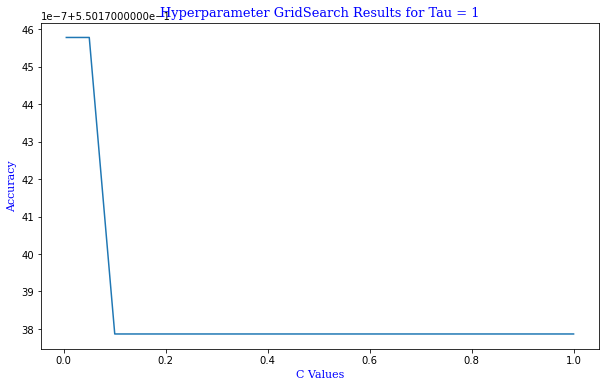

In [19]:
c = [0.005, 0.01, 0.05, 0.1, 0.5, 1]

lr_gridsearch(X_train_m, y_train_m, c, '1')

Tuned hyperparameter is at {'C': 0.009} with accuracy : 0.5501745781436849


params  mean_test_score
0                  {'C': 0.009}         0.550175
1   {'C': 0.028999999999999998}         0.550175
2   {'C': 0.048999999999999995}         0.550175
3    {'C': 0.06899999999999999}         0.550174
4    {'C': 0.08899999999999998}         0.550174
5    {'C': 0.10899999999999997}         0.550174
6    {'C': 0.12899999999999998}         0.550174
7                  {'C': 0.149}         0.550174
8    {'C': 0.16899999999999998}         0.550174
9    {'C': 0.18899999999999997}         0.550174
10   {'C': 0.20899999999999996}         0.550174
11   {'C': 0.22899999999999998}         0.550174
12   {'C': 0.24899999999999997}         0.550174
13   {'C': 0.26899999999999996}         0.550174
14                 {'C': 0.289}         0.550174

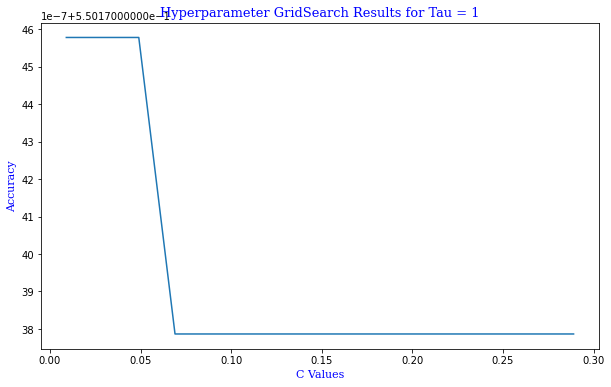

In [20]:
lr_gridsearch(X_train_m, y_train_m, np.arange(0.009, 0.3, 0.02), '1')

### PE, TAU = 3

Tuned hyperparameter is at {'C': 0.5} with accuracy : 0.6118500261801181


params  mean_test_score
0  {'C': 0.005}         0.611844
1   {'C': 0.01}         0.611844
2   {'C': 0.05}         0.611848
3    {'C': 0.1}         0.611848
4    {'C': 0.5}         0.611850
5      {'C': 1}         0.611850

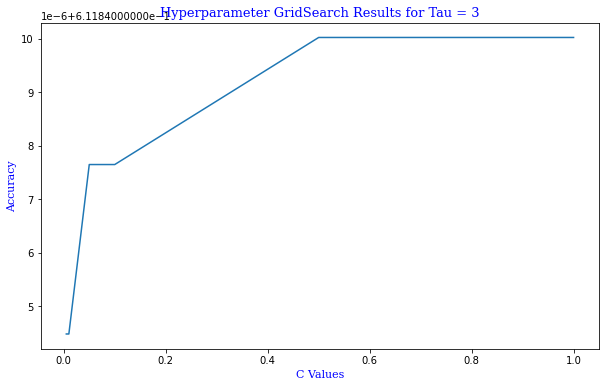

In [25]:
c = [0.005, 0.01, 0.05, 0.1, 0.5, 1]

lr_gridsearch(X_train_m3, y_train_m3, c, '3')

Tuned hyperparameter is at {'C': 0.20899999999999996} with accuracy : 0.6118500261801181


params  mean_test_score
0                  {'C': 0.009}         0.611844
1   {'C': 0.028999999999999998}         0.611844
2   {'C': 0.048999999999999995}         0.611848
3    {'C': 0.06899999999999999}         0.611848
4    {'C': 0.08899999999999998}         0.611848
5    {'C': 0.10899999999999997}         0.611848
6    {'C': 0.12899999999999998}         0.611848
7                  {'C': 0.149}         0.611849
8    {'C': 0.16899999999999998}         0.611849
9    {'C': 0.18899999999999997}         0.611849
10   {'C': 0.20899999999999996}         0.611850
11   {'C': 0.22899999999999998}         0.611850
12   {'C': 0.24899999999999997}         0.611850
13   {'C': 0.26899999999999996}         0.611850
14                 {'C': 0.289}         0.611850

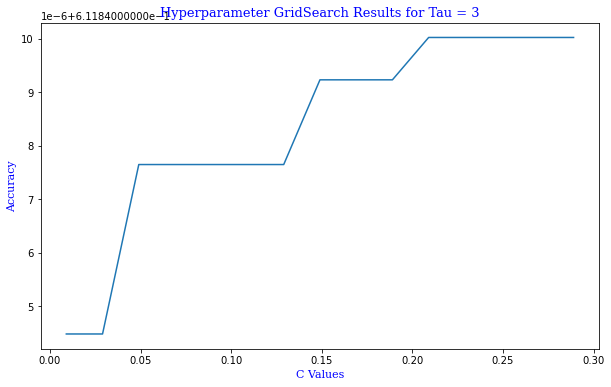

In [26]:
lr_gridsearch(X_train_m3, y_train_m3, np.arange(0.009, 0.3, 0.02), '3')

### TAU = 1, Final Results: Logistic Regression

In [27]:
#importing the logistic regression function from sklearn 
log_reg = LogisticRegression(solver = 'liblinear', C=0.009, penalty = 'l1')
#training the model on dev data 
log_reg.fit(X_train_m,y_train_m)

#using the test data to test for the scores
y_pred_lr = log_reg.predict(X_test_m)
metricscalc(y_test_m, y_pred_lr) 

Accuracy: 0.549 
Error: 0.451 
Precesion: 0.550 
Recall: 0.550 
F1 score:0.549 



### TAU = 3, Final Results: Logistic Regression

In [28]:
#importing the logistic regression function from sklearn 
log_reg = LogisticRegression(solver = 'liblinear', C=0.009, penalty = 'l1')
#training the model on dev data 
log_reg.fit(X_train_m3,y_train_m3)

#using the test data to test for the scores
y_pred_lr = log_reg.predict(X_test_m3)
metricscalc(y_test_m3, y_pred_lr) 

Accuracy: 0.610 
Error: 0.390 
Precesion: 0.619 
Recall: 0.613 
F1 score:0.607 



## 3.2 Random Forest: Classifying ALL DRUGS (maindf)

### TAU = 1

In [21]:
#importing random forest from sklearn
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs =2, n_estimators = 100)
#fitting the x dev and y dev to the random forest classifier
#training on dev data
rfc.fit(X_train_m,y_train_m)

#testing on test data 
y_pred_rf = rfc.predict(X_test_m)
metricscalc(y_test_m,y_pred_rf)

Accuracy: 0.540 
Error: 0.460 
Precesion: 0.539 
Recall: 0.539 
F1 score:0.539 



In [22]:
#importing random forest from sklearn
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs =2, n_estimators = 80)
#fitting the x dev and y dev to the random forest classifier
#training on dev data
rfc.fit(X_train_m,y_train_m)

#testing on test data 
y_pred_rf = rfc.predict(X_test_m)
metricscalc(y_test_m,y_pred_rf)

Accuracy: 0.540 
Error: 0.460 
Precesion: 0.539 
Recall: 0.539 
F1 score:0.539 



### TAU = 3

In [23]:
#importing random forest from sklearn
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs =2, n_estimators = 100)
#fitting the x dev and y dev to the random forest classifier
#training on dev data
rfc.fit(X_train_m3,y_train_m3)

#testing on test data 
y_pred_rf = rfc.predict(X_test_m3)
metricscalc(y_test_m3,y_pred_rf)

Accuracy: 0.588 
Error: 0.412 
Precesion: 0.589 
Recall: 0.589 
F1 score:0.587 



In [24]:
def rf_gridsearch (x, y, cvalues):
    #training the model
    clf= GridSearchCV(RandomForestClassifier(random_state = 1), {'n_estimators':cvalues}, cv=5) #cv = 5 is using 5 fold cross validation
    clf.fit(x, y)
    clf.cv_results_ #gridsearch function that prints results

    #displaying the results
    #best params is a setting that gave the best results on the hold out data
    #best score is the mean cross-validated score of the best_estimator 
    print("Tuned hyperparameter is at",clf.best_params_, "with accuracy :",clf.best_score_) 

    #displaying the results
    df = pd.DataFrame(clf.cv_results_)
    display(df[['params','mean_test_score' ]])


    xplt = np.array(cvalues)
    plt.figure(figsize = (10,6))
    plt.plot(xplt, df.mean_test_score)

    #displaying the results in a graph
    font1 = {'family':'serif','color':'blue','size':13}
    font2 = {'family':'serif','color':'blue','size':11}
    plt.title('Hyperparameter GridSearch Results', fontdict = font1)
    plt.xlabel('Number of esimators', fontdict = font2)
    plt.ylabel('Accuracy', fontdict = font2)
    plt.show()

In [ ]:
rf_gridsearch(X_train_m, y_train_m, np.arange(20, 120, 20))

# Part 4: Cross Classification

### KET

### PE, Tau = 1

In [29]:
ktrain, ktest, X_train_k, y_train_k, X_test_k, y_test_k, k_dataset_orig = splitdata (ketdf, 'PE')

282015.0
training data size (658035, 2)
testing data size (282015, 2)


### PE, Tau = 3

In [30]:
k3train, k3test, X_train_k3, y_train_k3, X_test_k3, y_test_k3, k3_dataset_orig = splitdata (ketdf, 'PET3')

282015.0
training data size (658035, 2)
testing data size (282015, 2)


### PSI 

### PE, Tau = 1

In [31]:
ptrain, ptest, X_train_p, y_train_p, X_test_p, y_test_p, p_dataset_orig = splitdata (psidf, 'PE')

98658.0
training data size (230201, 2)
testing data size (98659, 2)


### PE, Tau = 3

In [32]:
p3train, p3test, X_train_p3, y_train_p3, X_test_p3, y_test_p3, p3_dataset_orig = splitdata (psidf, 'PET3')

98658.0
training data size (230201, 2)
testing data size (98659, 2)


### LSD

In [33]:
ltrain, ltest, X_train_l, y_train_l, X_test_l, y_test_l, l_dataset_orig = splitdata (lsddf, 'PE')

160758.0
training data size (375102, 2)
testing data size (160758, 2)


In [34]:
l3train, l3test, X_train_l3, y_train_l3, X_test_l3, y_test_l3, l3_dataset_orig = splitdata (lsddf, 'PET3')

160758.0
training data size (375102, 2)
testing data size (160758, 2)


### LSD TEST, PSI TRAIN

### Tau = 1

In [35]:
#importing the logistic regression function from sklearn 
log_reg = LogisticRegression(solver = 'liblinear', C=0.009, penalty = 'l1')
#training the model on dev data 
log_reg.fit(X_train_p,y_train_p)

#using the test data to test for the scores
y_pred_lr = log_reg.predict(X_test_l)
metricscalc(y_test_l, y_pred_lr) 

Accuracy: 0.591 
Error: 0.409 
Precesion: 0.596 
Recall: 0.592 
F1 score:0.588 



In [36]:
#importing random forest from sklearn
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs =2, n_estimators = 80)
#fitting the x dev and y dev to the random forest classifier
#training on dev data
rfc.fit(X_train_p,y_train_p)

#testing on test data 
y_pred_rf = rfc.predict(X_test_l)
metricscalc(y_test_l,y_pred_rf)

Accuracy: 0.527 
Error: 0.473 
Precesion: 0.527 
Recall: 0.527 
F1 score:0.526 



In [37]:
#importing the logistic regression function from sklearn 
log_reg = LogisticRegression(solver = 'liblinear', C=0.009, penalty = 'l1')
#training the model on dev data 
log_reg.fit(X_train_p3,y_train_p3)

#using the test data to test for the scores
y_pred_lr = log_reg.predict(X_test_l3)
metricscalc(y_test_l3, y_pred_lr) 

Accuracy: 0.627 
Error: 0.373 
Precesion: 0.630 
Recall: 0.628 
F1 score:0.626 



In [38]:
#importing random forest from sklearn
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs =2, n_estimators = 80)
#fitting the x dev and y dev to the random forest classifier
#training on dev data
rfc.fit(X_train_p3,y_train_p3)

#testing on test data 
y_pred_rf = rfc.predict(X_test_l3)
metricscalc(y_test_l3,y_pred_rf)

Accuracy: 0.530 
Error: 0.470 
Precesion: 0.531 
Recall: 0.531 
F1 score:0.530 



### LSD TEST, KET TRAIN

In [48]:
#importing the logistic regression function from sklearn 
log_reg = LogisticRegression(solver = 'liblinear', C=1, penalty = 'l1')
#training the model on dev data 
log_reg.fit(X_train_k,y_train_k)

#using the test data to test for the scores
y_pred_lr = log_reg.predict(X_test_l)
metricscalc(y_test_l, y_pred_lr) 

Accuracy: 0.587 
Error: 0.413 
Precesion: 0.596 
Recall: 0.589 
F1 score:0.580 



In [42]:
#importing random forest from sklearn
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs =2, n_estimators = 80)
#fitting the x dev and y dev to the random forest classifier
#training on dev data
rfc.fit(X_train_k,y_train_k)

#testing on test data 
y_pred_rf = rfc.predict(X_test_l)
metricscalc(y_test_l,y_pred_rf)

Accuracy: 0.502 
Error: 0.498 
Precesion: 0.503 
Recall: 0.503 
F1 score:0.502 



In [46]:
#importing the logistic regression function from sklearn 
log_reg = LogisticRegression(solver = 'liblinear', C=0.009, penalty = 'l1')
#training the model on dev data 
log_reg.fit(X_train_k3,y_train_k3)

#using the test data to test for the scores
y_pred_lr = log_reg.predict(X_test_l3)
metricscalc(y_test_l3, y_pred_lr)

log_reg.score(X_test_l3, y_test_l3)

Accuracy: 0.643 
Error: 0.357 
Precesion: 0.646 
Recall: 0.642 
F1 score:0.640 



0.6428980206272783

In [47]:
#importing random forest from sklearn
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs =2, n_estimators = 80)
#fitting the x dev and y dev to the random forest classifier
#training on dev data
rfc.fit(X_train_k3,y_train_k3)

#testing on test data 
y_pred_rf = rfc.predict(X_test_l3)
metricscalc(y_test_l3,y_pred_rf)

Accuracy: 0.556 
Error: 0.444 
Precesion: 0.556 
Recall: 0.556 
F1 score:0.556 



### PSI TEST, LSD TRAIN

In [50]:
#importing the logistic regression function from sklearn 
log_reg = LogisticRegression(solver = 'liblinear', C=0.009, penalty = 'l1')
#training the model on dev data 
log_reg.fit(X_train_l,y_train_l)

#using the test data to test for the scores
y_pred_lr = log_reg.predict(X_test_p)
metricscalc(y_test_p, y_pred_lr) 

Accuracy: 0.567 
Error: 0.433 
Precesion: 0.580 
Recall: 0.576 
F1 score:0.564 



In [51]:
#importing the logistic regression function from sklearn 
log_reg = LogisticRegression(solver = 'liblinear', C=0.009, penalty = 'l1')
#training the model on dev data 
log_reg.fit(X_train_l3,y_train_l3)

#using the test data to test for the scores
y_pred_lr = log_reg.predict(X_test_p3)
metricscalc(y_test_p3, y_pred_lr)

log_reg.score(X_test_p3, y_test_p3)

Accuracy: 0.559 
Error: 0.441 
Precesion: 0.573 
Recall: 0.569 
F1 score:0.556 



0.5593103518178777

In [52]:
#importing random forest from sklearn
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs =2, n_estimators = 80)
#fitting the x dev and y dev to the random forest classifier
#training on dev data
rfc.fit(X_train_l,y_train_l)

#testing on test data 
y_pred_rf = rfc.predict(X_test_p)
metricscalc(y_test_p,y_pred_rf)

Accuracy: 0.527 
Error: 0.473 
Precesion: 0.530 
Recall: 0.530 
F1 score:0.527 



In [53]:
#importing random forest from sklearn
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs =2, n_estimators = 80)
#fitting the x dev and y dev to the random forest classifier
#training on dev data
rfc.fit(X_train_l3,y_train_l3)

#testing on test data 
y_pred_rf = rfc.predict(X_test_p3)
metricscalc(y_test_p3,y_pred_rf)

Accuracy: 0.535 
Error: 0.465 
Precesion: 0.541 
Recall: 0.540 
F1 score:0.534 



### PSI TEST, KET TRAIN

In [54]:
#importing the logistic regression function from sklearn 
log_reg = LogisticRegression(solver = 'liblinear', C=0.009, penalty = 'l1')
#training the model on dev data 
log_reg.fit(X_train_k,y_train_k)

#using the test data to test for the scores
y_pred_lr = log_reg.predict(X_test_p)
metricscalc(y_test_p, y_pred_lr) 

Accuracy: 0.589 
Error: 0.411 
Precesion: 0.584 
Recall: 0.579 
F1 score:0.576 



In [55]:
#importing the logistic regression function from sklearn 
log_reg = LogisticRegression(solver = 'liblinear', C=0.009, penalty = 'l1')
#training the model on dev data 
log_reg.fit(X_train_k3,y_train_k3)

#using the test data to test for the scores
y_pred_lr = log_reg.predict(X_test_p3)
metricscalc(y_test_p3, y_pred_lr)

log_reg.score(X_test_p3, y_test_p3)

Accuracy: 0.563 
Error: 0.437 
Precesion: 0.569 
Recall: 0.568 
F1 score:0.562 



0.5628477888484578

In [56]:
#importing random forest from sklearn
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs =2, n_estimators = 80)
#fitting the x dev and y dev to the random forest classifier
#training on dev data
rfc.fit(X_train_k,y_train_k)

#testing on test data 
y_pred_rf = rfc.predict(X_test_p)
metricscalc(y_test_p,y_pred_rf)

Accuracy: 0.504 
Error: 0.496 
Precesion: 0.502 
Recall: 0.502 
F1 score:0.502 



In [57]:
#importing random forest from sklearn
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs =2, n_estimators = 80)
#fitting the x dev and y dev to the random forest classifier
#training on dev data
rfc.fit(X_train_k3,y_train_k3)

#testing on test data 
y_pred_rf = rfc.predict(X_test_p3)
metricscalc(y_test_p3,y_pred_rf)

Accuracy: 0.525 
Error: 0.475 
Precesion: 0.521 
Recall: 0.521 
F1 score:0.521 



### KET TEST, PSI TRAIN

In [58]:
#importing the logistic regression function from sklearn 
log_reg = LogisticRegression(solver = 'liblinear', C=0.009, penalty = 'l1')
#training the model on dev data 
log_reg.fit(X_train_p,y_train_p)

#using the test data to test for the scores
y_pred_lr = log_reg.predict(X_test_k)
metricscalc(y_test_k, y_pred_lr) 

Accuracy: 0.508 
Error: 0.492 
Precesion: 0.505 
Recall: 0.505 
F1 score:0.502 



In [60]:
#importing the logistic regression function from sklearn 
log_reg = LogisticRegression(solver = 'liblinear', C=0.009, penalty = 'l1')
#training the model on dev data 
log_reg.fit(X_train_p3,y_train_p3)

#using the test data to test for the scores
y_pred_lr = log_reg.predict(X_test_k3)
metricscalc(y_test_k3, y_pred_lr)

log_reg.score(X_test_k3, y_test_k3)

Accuracy: 0.607 
Error: 0.393 
Precesion: 0.607 
Recall: 0.606 
F1 score:0.605 



0.6071840150346612

In [63]:
#importing random forest from sklearn
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs =2, n_estimators = 80)
#fitting the x dev and y dev to the random forest classifier
#training on dev data
rfc.fit(X_train_p,y_train_p)

#testing on test data 
y_pred_rf = rfc.predict(X_test_k)
metricscalc(y_test_k,y_pred_rf)

Accuracy: 0.505 
Error: 0.495 
Precesion: 0.504 
Recall: 0.504 
F1 score:0.504 



In [64]:
#importing random forest from sklearn
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs =2, n_estimators = 80)
#fitting the x dev and y dev to the random forest classifier
#training on dev data
rfc.fit(X_train_p3,y_train_p3)

#testing on test data 
y_pred_rf = rfc.predict(X_test_k3)
metricscalc(y_test_k3,y_pred_rf)

Accuracy: 0.527 
Error: 0.473 
Precesion: 0.526 
Recall: 0.526 
F1 score:0.526 



### KET TEST, LSD TRAIN

In [65]:
#importing the logistic regression function from sklearn 
log_reg = LogisticRegression(solver = 'liblinear', C=0.009, penalty = 'l1')
#training the model on dev data 
log_reg.fit(X_train_l,y_train_l)

#using the test data to test for the scores
y_pred_lr = log_reg.predict(X_test_k)
metricscalc(y_test_k, y_pred_lr) 

Accuracy: 0.513 
Error: 0.487 
Precesion: 0.518 
Recall: 0.517 
F1 score:0.508 



In [66]:
#importing the logistic regression function from sklearn 
log_reg = LogisticRegression(solver = 'liblinear', C=0.009, penalty = 'l1')
#training the model on dev data 
log_reg.fit(X_train_l3,y_train_l3)

#using the test data to test for the scores
y_pred_lr = log_reg.predict(X_test_k3)
metricscalc(y_test_k3, y_pred_lr)

log_reg.score(X_test_k3, y_test_k3)

Accuracy: 0.612 
Error: 0.388 
Precesion: 0.629 
Recall: 0.617 
F1 score:0.604 



0.6115348474371931

In [67]:
#importing random forest from sklearn
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs =2, n_estimators = 80)
#fitting the x dev and y dev to the random forest classifier
#training on dev data
rfc.fit(X_train_l,y_train_l)

#testing on test data 
y_pred_rf = rfc.predict(X_test_k)
metricscalc(y_test_k,y_pred_rf)

Accuracy: 0.506 
Error: 0.494 
Precesion: 0.507 
Recall: 0.507 
F1 score:0.505 



In [68]:
#importing random forest from sklearn
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs =2, n_estimators = 80)
#fitting the x dev and y dev to the random forest classifier
#training on dev data
rfc.fit(X_train_l3,y_train_l3)

#testing on test data 
y_pred_rf = rfc.predict(X_test_k3)
metricscalc(y_test_k3,y_pred_rf)

Accuracy: 0.557 
Error: 0.443 
Precesion: 0.560 
Recall: 0.559 
F1 score:0.556 

